In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
color_dict = {"Sonstige": "grey",
            "Linke" :  "#96276E",
"FDP":"#F6BB00",
"AfD":"#34A3D2",
"SPD":"#DB4240",
"CSU":"#373737",
"CDU":"#373737",
"CDU/CSU": '#373737',
"Grüne":"#4BA345",
"PIRATE": "#FF8800"}

In [6]:
data = pd.read_csv('sonntagsfrage.csv', delimiter = ';')
data.rename(index=str, columns={"Linke*": "Linke", 'Union' : 'CDU/CSU'}, inplace = True)
data.drop('Piraten', axis = 1, inplace = True)
#data.convert_objects(convert_numeric=True)
for label in ['CDU/CSU', 'SPD', 'Linke', 'Grüne', 'FDP', 'AfD', 'Sonstige']:
    data[label] = pd.to_numeric(data[label], errors = 'coerce')
data['Datum'] = pd.to_datetime(data['Datum'])
data.head()

,Datum,CDU/CSU,SPD,Linke,Grüne,FDP,AfD,Sonstige
0,2017-09-14,37.0,20.0,9.0,7.5,9.5,12.0,5.0
1,2017-07-09,37.0,21.0,10.0,8.0,9.0,11.0,4.0
2,2017-08-31,37.0,23.0,9.0,8.0,8.0,11.0,4.0
3,2017-08-25,38.0,22.0,9.0,8.0,9.0,10.0,4.0
4,2017-09-08,39.0,24.0,9.0,8.0,8.0,8.0,4.0


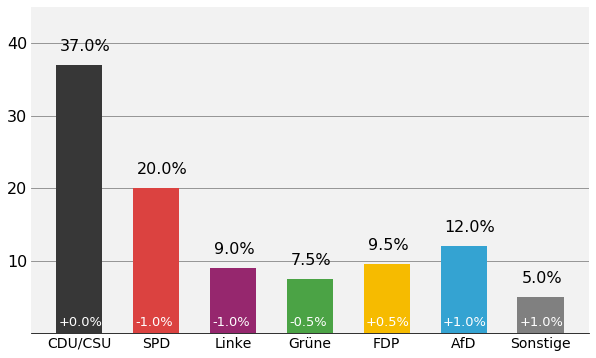

In [15]:
import numpy as np
values = []
label = []
colors = []
diff = []
for nr in range(1,8):
    values.append(float(data.iloc[0][nr]))
    key = data.columns[nr]
    label.append(key)
    colors.append(color_dict[key])
    diff.append(float(data.iloc[0][nr])-float(data.iloc[1][nr]))
#label = ['CDU/CSU', 'SPD', 'Linke', 'Grüne', 'FDP', 'AfD', 'Sonstige']

fig= plt.figure(figsize = (10,6))
ax = plt.gca()
index = np.arange(len(values))
bar_width = 0.6
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='-')
ax.bar(index, values, bar_width,
                 color= colors
                 )
plt.xticks(index +bar_width / 2-0.3,label ,fontsize=14)
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.yticks([10,20,30,40],fontsize=16)
xy = (index[0], values[0])
for go in index:
    text = str(values[go])+'%'
    ax.annotate(text, xy=(index[go]-0.25, values[go]+2), fontsize=16)
for go in index:
    di = diff[go]
    text = str(diff[go])+'%'
    if di>=0:
        text = '+' + text
    ax.annotate(text, xy=(index[go]-0.27, 1), color = 'white', fontsize=13)
ax.set_ylim(0,45)
ax.set_facecolor('0.95')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
#plt.title('Sonntags-Frage vom '+ data['Datum'].iloc[0], fontsize = 24)
plt.savefig('sonntagsfrage_aktuell.jpg', bbox_inches='tight')

plt.show()

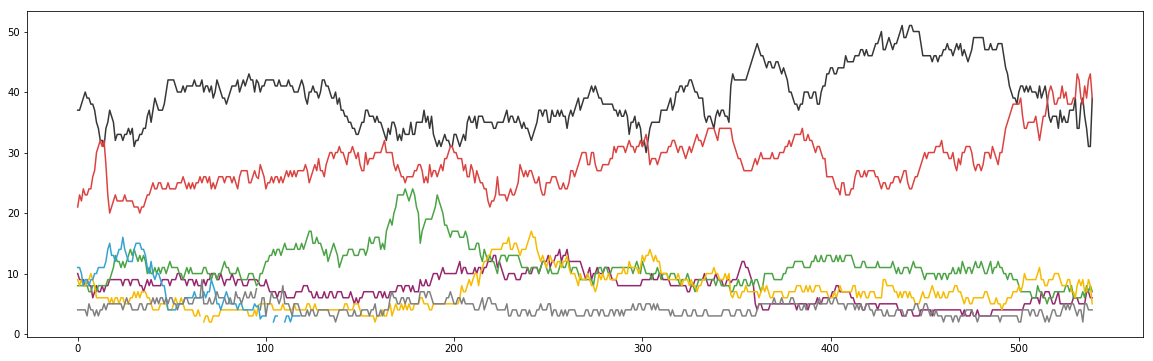

In [11]:
year = data.iloc[0:20]
fig = plt.figure(figsize = (20,6)) 
ax = fig.gca()
index = np.arange(data.shape[0])
for lab in label:
    ax.plot(index,data[lab], label = data['Datum'], color = color_dict[lab])
    
plt.show()


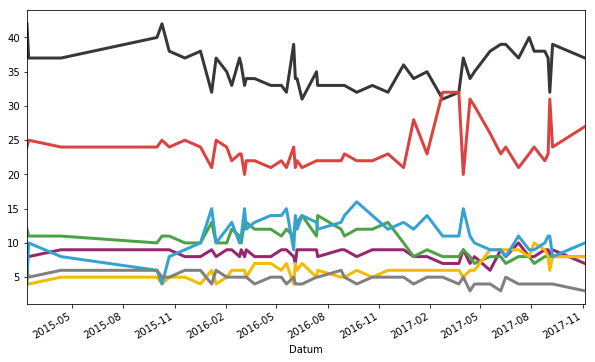

In [12]:
year = data.iloc[0:50]
year.plot(x = 'Datum', color = colors, legend=False, figsize= (10,6), linewidth = 3)
plt.show()